# De Invoke a Stream
* El streaming proporciona varias formas de visualizar el output de una aplicación LangGraph.

## Invoke vs. Stream

En LangGraph, la diferencia entre `graph.invoke` y `graph.stream` radica en cómo manejan el **flujo de ejecución** y los **resultados** al trabajar con nodos en un graph.

#### 1. **`graph.invoke`**:
   - **Propósito**: Ejecuta el graph **de una sola vez** y devuelve el **resultado final**.
   - **Comportamiento**:
     - Ejecuta todos los nodos necesarios para calcular el input.
     - La computación es **sincrónica**, lo que significa que se espera hasta que el graph complete todo su proceso.
   - **Caso de uso**: Cuando necesitas el **resultado final** de un graph y no te interesan los pasos intermedios ni el streaming.

   **Ejemplo**:  
   Si tienes un graph que toma datos de entrada, los procesa a través de varios nodos y genera un resumen, `graph.invoke` hará lo siguiente:
     - Ejecutará todo el graph.
     - Devolverá el resumen final como un único resultado.

#### 2. **`graph.stream`**:
   - **Propósito**: Ejecuta el graph **de forma incremental**, proporcionando outputs intermedios o actualizaciones a medida que el graph procesa.
   - **Comportamiento**:
     - Permite observar la **salida de los nodos a medida que se completan**, en lugar de esperar a que termine todo el graph.
     - Ideal para **actualizaciones en tiempo real** o **progresivas**.
   - **Caso de uso**: Cuando deseas monitorear o actuar sobre **resultados intermedios** a medida que se generan.

   **Ejemplo**:  
   Si el graph está analizando datos en fragmentos, `graph.stream` hará lo siguiente:
     - Proporcionará outputs intermedios para cada fragmento a medida que se procesan.
     - Permitirá manejar o mostrar los resultados progresivamente, sin necesidad de esperar a que todo el proceso termine.

#### **Resumen**:
- **`graph.invoke`**: Entiéndelo como "Ejecuta todo el proceso y dame el resultado final."
- **`graph.stream`**: Entiéndelo como "Ejecuta el proceso paso a paso y muéstrame los resultados a medida que ocurren."

La elección entre uno u otro depende de si necesitas el resultado completo de una vez (`invoke`) o prefieres recibir actualizaciones durante el proceso (`stream`).

## La importancia de Stream en LangGraph: algunas pistas

Puedes comprender la importancia de `.stream` en LangGraph observando los siguientes conceptos:

#### **1. ¿Qué es un step en LangGraph?**

- Un **step** es como un momento en la ejecución de la aplicación donde se realiza algún trabajo.
- Generalmente, cada **nodo** en el graph representa un step separado porque realiza una tarea específica.
- Sin embargo, si varios nodos están configurados para ejecutarse **al mismo tiempo (en paralelo)**, todos pertenecen al **mismo step**, ya que se ejecutan juntos.
- **Nota clave**: El equipo de LangGraph a veces usa los términos **"step"** y **"checkpoint"** de manera intercambiable, por lo que puedes considerarlos como sinónimos.

#### **2. ¿Cómo podemos ver el state de una aplicación en LangGraph?**

- El **state** es como una instantánea de todo lo que la aplicación sabe o ha hecho hasta un cierto step.
  - **`graph.get_state()`**:
    - Te da el **state actual** (lo que está ocurriendo en este momento o lo que acaba de finalizar).
    - Muestra lo que la aplicación sabe en el **último step**.
  - **`graph.get_state_history()`**:
    - Proporciona una **lista de todos los state pasados**.
    - Es como una línea de tiempo que muestra cómo ha progresado la aplicación a través de cada step.

#### **3. ¿Cómo podemos ejecutar una aplicación comenzando desde diferentes steps en LangGraph?**

- Puedes controlar desde qué step comienza el procesamiento de la aplicación.
  - **`graph.stream(None, {thread_id})`**:
    - Inicia la aplicación desde el **step más reciente** (el último state).
    - Útil si solo quieres continuar desde donde la aplicación se detuvo.
  - **`graph.stream(None, {particular_step, thread_id})`**:
    - Inicia la aplicación desde un **step específico** que elijas.
    - Útil si deseas volver a intentar o reejecutar desde un punto anterior en la línea de tiempo del graph.

#### **Analogía**:

Imagina que estás leyendo un libro:
- Un **step** es como un capítulo del libro.
  - La mayoría de los capítulos (nodos) se leen uno a la vez, pero algunos capítulos (nodos en paralelo) se leen simultáneamente.
- **`graph.get_state()`**: Te dice en qué capítulo estás leyendo actualmente.
- **`graph.get_state_history()`**: Te da un resumen de todos los capítulos que has leído hasta ahora.
- **`graph.stream(None, {thread_id})`**: Continúa la lectura desde el último capítulo.
- **`graph.stream(None, {particular_step, thread_id})`**: Te permite retroceder y releer un capítulo específico antes de continuar.

## Setup

#### After you download the code from the github repository in your computer
In terminal:
* cd project_name
* pyenv local 3.11.4
* poetry install
* poetry shell

#### To open the notebook with Jupyter Notebooks
In terminal:
* jupyter lab

Go to the folder of notebooks and open the right notebook.

#### To see the code in Virtual Studio Code or your editor of choice.
* open Virtual Studio Code or your editor of choice.
* open the project-folder
* open the 015-streaming.py file

## Create your .env file
* In the github repo we have included a file named .env.example
* Rename that file to .env file and here is where you will add your confidential api keys. Remember to include:
* OPENAI_API_KEY=your_openai_api_key
* LANGCHAIN_TRACING_V2=true
* LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
* LANGCHAIN_API_KEY=your_langchain_api_key
* LANGCHAIN_PROJECT=your_project_name

## Track operations
From now on, we can track the operations **and the cost** of this project from LangSmith:
* [smith.langchain.com](https://smith.langchain.com)

## Connect with the .env file located in the same directory of this notebook

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [1]:
#pip install python-dotenv

In [2]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]

#### Install LangChain

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [3]:
#!pip install langchain

## Connect with an LLM

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [4]:
#!pip install langchain-openai

In [5]:
from langchain_openai import ChatOpenAI

chatModel35 = ChatOpenAI(model="gpt-3.5-turbo-0125")
chatModel4o = ChatOpenAI(model="gpt-4o")

## Streaming
* Veamos varias formas de stream outputs desde una aplicación de LangGraph.  
* Comenzaremos reutilizando la lógica de nuestra aplicación anterior.  
* **Ten en cuenta que el equipo de LangGraph incluye `RunnableConfig` con `call_model` para habilitar token-wise streaming. Esto solo es necesario con Python < 3.11.**

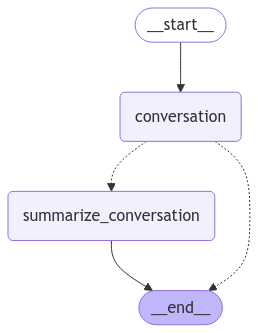

In [6]:
from IPython.display import Image, display

from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage
from langchain_core.runnables import RunnableConfig

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

# LLM
model = ChatOpenAI(model="gpt-4o", temperature=0) 

# State 
class State(MessagesState):
    summary: str

# Define the logic to call the model
def call_model(state: State, config: RunnableConfig):
    
    # Get summary if it exists
    summary = state.get("summary", "")

    # If there is summary, then we add it
    if summary:
        
        # Add summary to system message
        system_message = f"Summary of conversation earlier: {summary}"

        # Append summary to any newer messages
        messages = [SystemMessage(content=system_message)] + state["messages"]
    
    else:
        messages = state["messages"]
    
    response = model.invoke(messages, config)
    return {"messages": response}

def summarize_conversation(state: State):
    
    # First, we get any existing summary
    summary = state.get("summary", "")

    # Create our summarization prompt 
    if summary:
        
        # A summary already exists
        summary_message = (
            f"This is summary of the conversation to date: {summary}\n\n"
            "Extend the summary by taking into account the new messages above:"
        )
        
    else:
        summary_message = "Create a summary of the conversation above:"

    # Add prompt to our history
    messages = state["messages"] + [HumanMessage(content=summary_message)]
    response = model.invoke(messages)
    
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"summary": response.content, "messages": delete_messages}

# Determine whether to end or summarize the conversation
def should_continue(state: State):
    
    """Return the next node to execute."""
    
    messages = state["messages"]
    
    # If there are more than six messages, then we summarize the conversation
    if len(messages) > 6:
        return "summarize_conversation"
    
    # Otherwise we can just end
    return END

# Define a new graph
workflow = StateGraph(State)
workflow.add_node("conversation", call_model)
workflow.add_node(summarize_conversation)

# Set the entrypoint as conversation
workflow.add_edge(START, "conversation")
workflow.add_conditional_edges("conversation", should_continue)
workflow.add_edge("summarize_conversation", END)

# Compile
memory = MemorySaver()
graph = workflow.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

## LangGraph admite diferentes modos de streaming para el state del graph

En LangGraph, al usar `stream_mode`, la opción define **qué tipo de información** recibes mientras el graph se está ejecutando. Aquí está la diferencia entre `"updates"` y `"values"`:

#### **1. `stream_mode="updates"`**
- **Qué hace**: Envía actualizaciones sobre el **state del graph**.
- **Qué recibes**:
  - Notificaciones cuando los nodos están **iniciando**, **en proceso** o **completados**.
  - Es como recibir un informe de progreso sobre **lo que está ocurriendo** en el graph.
- **Caso de uso**:
  - Útil si deseas monitorear la actividad del graph o **depurar** su ejecución.
  - Ejemplo: "El nodo A ha comenzado a procesar", "El nodo B ha finalizado".

#### **2. `stream_mode="values"`**
- **Qué hace**: Envía los **outputs reales** de los nodos a medida que se calculan.
- **Qué recibes**:
  - Los **datos o resultados** generados por los nodos conforme terminan su trabajo.
  - Es como recibir las **respuestas** intermedias o finales que el graph está produciendo.
- **Caso de uso**:
  - Útil si necesitas los **resultados** de los nodos tan pronto como estén disponibles.
  - Ejemplo: "El nodo A produjo el valor X", "El nodo B produjo el valor Y".

#### **Diferencia clave**:
- `"updates"`: Se centra en **qué está haciendo** el graph (progress updates).
- `"values"`: Se centra en **qué está produciendo** el graph (data outputs).

#### **Analogía sencilla**:
Imagina que estás horneando un pastel:
- **`stream_mode="updates"`**: Recibes mensajes como "El horno se está precalentando", "La masa está en el horno", "El pastel está listo".
- **`stream_mode="values"`**: Pruebas la masa, el glaseado y el pastel a medida que se preparan, mostrando los **resultados** de cada paso.

Elige `"updates"` para rastrear la **actividad** y `"values"` para rastrear los **resultados**.

## Lo entenderás más fácilmente viendo la siguiente imagen  
* `stream_mode="updates"`: Este modo transmite solo las actualizaciones del state después de que se llama a cada nodo.  
* `stream_mode="values"`: Este modo transmite el state completo después de que se llama a cada nodo.

![Simple graph](graph004.png)

## Diferencias entre los modos "values" y "updates" en el Streaming de LangGraph

LangGraph ofrece dos modos principales para transmitir outputs durante la ejecución de un graph: **"values"** y **"updates"**. Estos modos difieren en la forma en que manejan y entregan la información del state después de cada step del graph. Aquí tienes una explicación simplificada:

#### **1. El modo "values"**  
- **Qué hace:**  
  - Transmite el **state completo** del graph **después de cada step** completado.  
  - El state refleja **todas las actualizaciones** realizadas hasta ese punto, proporcionando una **instantánea** del progreso del graph.  

- **Característica clave:**  
  - Obtienes **una visión completa** del stae actual, incluyendo cualquier valor no modificado que se mantenga.  

- **Ejemplos de casos de uso:**  
  1. **Seguimiento del progreso:**  
     - Permite monitorear cómo evoluciona el state general después de cada step.  
  2. **Depuración y registro:**  
     - Útil para revisar todo el contexto si algo sale mal.  
  3. **Validación del state final:**  
     - Permite verificar la estructura completa de los datos después de cualquier step para detectar cambios inesperados.  

#### **2. El modo "updates"**  
- **Qué hace:**  
  - Transmite **solo los cambios (actualizaciones)** realizados en el state durante un step.  
  - Si múltiples actualizaciones ocurren en el mismo step (por ejemplo, si varios nodos se ejecutan en paralelo), cada actualización se transmite **individualmente**.  

- **Característica clave:**  
  - Se enfoca en **solo los cambios** en lugar de todo el state.  

- **Ejemplos de casos de uso:**  
  1. **Retroalimentación incremental:**  
     - Ideal para sistemas en tiempo real donde se necesitan **resultados parciales** en cuanto estén disponibles (por ejemplo, chatbots).  
  2. **Eficiencia en estados grandes:**  
     - Evita reenviar partes del state que no han cambiado, lo que lo hace **más rápido y liviano** para graphs complejos.  
  3. **Aplicaciones interactivas:**  
     - Excelente para aplicaciones que requieren **actualizaciones continuas**, como formularios dinámicos o visualizaciones en vivo.  

#### **Tabla resumen**

| Característica  | Modo "values"                            | Modo "updates"                          |
|---------------|-------------------------------------------|------------------------------------------|
| **Transmite**   | State completo después de cada paso     | Solo los cambios (actualizaciones)      |
| **Granularidad**| Alta (instantánea completa)             | Baja (actualizaciones incrementales)    |
| **Mejor para**  | Depuración, seguimiento del progreso, validaciones finales | Retroalimentación en tiempo real, apps interactivas, eficiencia |

Ambos modos están diseñados para cubrir diferentes necesidades según si prefieres **instantáneas completas** o **actualizaciones incrementales**.

## Transmitiendo solo las actualizaciones del state con `stream_mode="updates"`

In [7]:
# Create a thread
config = {"configurable": {"thread_id": "1"}}

# Start conversation
for chunk in graph.stream(
    {"messages": [HumanMessage(content="Hi! I'm Julio")]}, 
    config, 
    stream_mode="updates"):
    print(chunk)

{'conversation': {'messages': AIMessage(content='Hello, Julio! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 11, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_5f20662549', 'finish_reason': 'stop', 'logprobs': None}, id='run-7e96d60d-9376-4faa-8d62-c278a6af91ac-0', usage_metadata={'input_tokens': 11, 'output_tokens': 12, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}}


* En el código anterior, cada fragmento es un diccionario de Python con el state actualizado de cada nodo.  
* Ahora, imprimamos la conversación:

In [8]:
# Start conversation
for chunk in graph.stream(
    {"messages": [HumanMessage(content="Hi! I'm Julio")]}, 
    config, 
    stream_mode="updates"):
    chunk['conversation']["messages"].pretty_print()

================================== Ai Message ==================================

Hi Julio! How can I help you today?


* Como puedes ver, **transmite solo las actualizaciones del state** después de que se llama a cada nodo.

## Transmitiendo el state completo con stream_mode="values"

In [9]:
# Start conversation, again
config = {"configurable": {"thread_id": "2"}}

# Start conversation
input_message = HumanMessage(content="Hi! I'm Julio")

for event in graph.stream(
    {"messages": [input_message]}, 
    config, 
    stream_mode="values"):
    for m in event['messages']:
        m.pretty_print()
    print("---"*25)

================================ Human Message =================================

Hi! I'm Julio
---------------------------------------------------------------------------
================================ Human Message =================================

Hi! I'm Julio
================================== Ai Message ==================================

Hello, Julio! How can I assist you today?
---------------------------------------------------------------------------


* Como puedes ver, **ahora transmite el state completo** después de que se llama a cada nodo.

## Otras posibilidades de streaming  
* También podrías transmitir otros componentes del output, como los tokens, usando el método `.astream_events`.  
* Consulta la [guía completa sobre transmisión](https://langchain-ai.github.io/langgraph/concepts/streaming/) para más información.

## Cómo ejecutar el código desde Visual Studio Code  
* En Visual Studio Code, busca el archivo `015-streaming.py`.  
* En la terminal, asegúrate de estar en el directorio del archivo y ejecuta:  
    * `python 015-streaming.py`